# Week2授業課題 富士下山

# 1.この課題の目的

- 機械学習で使われている勾配降下法の仕組みを知る

# 2.富士山から下りたい

2.富士山から下りたい
授業前課題2では「勾配降下法」に触れました。勾配降下法は山や谷を下ることに例えられます。先週は紙を折って超えることを目指した富士山を、今週は頂上付近から下りていくことにしましょう。

## 断面図の確認
以下の図は富士山の断面図です。相模湾から富士山頂上付近を通り南アルプス方面へと切り取りました。縦軸は標高、横軸は300等分した番号が振られています。

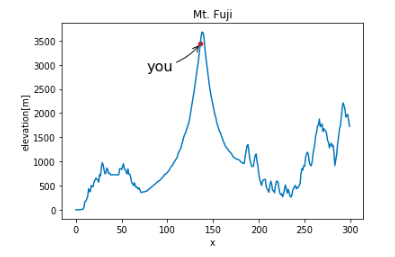

In [1]:
# 断面図の表示例
from IPython.display import Image, display_png
display_png(Image('test_sectional_view.png'))

この断面図を見れば低い場所はすぐに分かりますが、あなたは暗闇の中、赤い点の箇所(x=136)にいるという状況を想像します。足元の傾きしか分からない中で富士山から下りるというプログラムを作っていきましょう。

- 出典

今回使用するデータは国土地理院の電子地形図の断面図機能を使用し取得しました。

[立体地図（日本の主な山岳）](https://cyberjapandata.gsi.go.jp/3d/mountain/mountain.html)

## データの取得
このデータをcsvファイルで配布しますので、以下のコードで読み込みます。

>import numpy as np
>
>np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
>
>fuji = np.loadtxt("week2_session1_mtfuji_data.csv",delimiter=",", skiprows=1)

一部を出力させると、以下のような中身になっています。

左から順番に「その地点の番号(x)」「緯度」「経度」「標高(elevation)」「地点0からの距離」となっています。標高と距離の単位はメートルです。

##  【問題1】断面図の作成
前述の断面図をMatplotlibを使い作成してください。x=136の地点の赤い点や矢印も表示させてください。
これ以降の問題では下りる過程の可視化を行いますが、その際にはこの断面図を活用してください。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する

fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)
fuji.shape

(300, 5)

In [3]:
df = pd.DataFrame(fuji)
df[50:100]

,0,1,2,3,4
50,50.0,35.218266,138.987919,831.00,16110.0
51,51.0,35.219947,138.985033,880.44,16433.0
52,52.0,35.221627,138.982146,955.14,16755.0
53,53.0,35.223308,138.979260,849.52,17077.0
54,54.0,35.224989,138.976373,831.60,17399.0
55,55.0,35.226669,138.973486,790.01,17721.0
56,56.0,35.228349,138.970599,738.97,18044.0
57,57.0,35.230030,138.967712,848.83,18366.0
58,58.0,35.231710,138.964825,738.30,18688.0
59,59.0,35.233390,138.961938,736.48,19010.0


In [4]:
# 136番目のデータを表示し、標高が3434.59mであることを確認
fuji[136]

array([  136.      ,    35.362555,   138.739261,  3434.59    ,
       43821.      ])

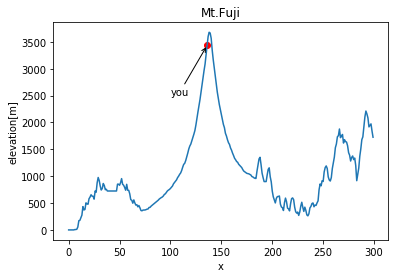

In [5]:
# テキストと矢印を表示
plt.annotate('you',xy=(136, 3434.59),xytext=(100, 2500), arrowprops = {'arrowstyle':'->'})

# 赤丸を表示
plt.plot(136, 3434.59,'ro')

# X軸の名前を指定
plt.xlabel('x')

# Y軸の名前を指定
plt.ylabel('elevation[m]')

# グラフのタイトルを指定
plt.title('Mt.Fuji')

# グラフを表示
plt.plot(fuji[:,0],fuji[:,3]);

## 【問題2】勾配の計算の関数

### 勾配を求める関数→$y$の変化量/$x$の変化量

In [6]:
'''
現在の地点の勾配を計算

Parameteres
--------------
current_point: int
    現在の地点

Returns
--------------:
変数なし:float
    移動すべき地点
'''    
def compute_gradient(current_point):
    
    # データを読み出しnumpy配列fuji　に格納
    fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)
    
    # 現在の地点を引数current_pointを変数xに格納
    x = current_point
    
    # 勾配を計算
    return (fuji[x - 1][3] - fuji[x][3])/ ((x - 1) - x)

### 初期値　x=136の時の勾配

In [7]:
compute_gradient(136)

168.35000000000036

### 検算

In [8]:
(fuji[135][3] - fuji[136][3]) / (135 - 136)

168.35000000000036

## 【問題3】勾配降下法の関数を作成

授業前課題では説明までとした勾配降下法ですが、これを行う関数を作成してください。

数式で表すと 「移動すべき地点 = 今いる地点 - 
α
 ×今いる地点の勾配」 となります。

この関数を使い、あなたが今いるxが136の地点（標高3434.59[m]）から、山を下っていきましょう。移動毎の標高はリストに記録し、その過程を可視化してください。断面図を目視したり、読み込んだ数値を確認して分かることと比べてどうなっているでしょうか。

- 実装上の注意
 - 移動すべき地点は基本的には小数となりますが、勾配の情報は整数値の場所でしか得られません。そのため、四捨五入により整数値に変換する必要があります。


- 可視化のヒント
 - 断面図の中に点を表示したり、繰り返し毎の標高や勾配を折れ線グラフで見てみることができます。


- αの補足
 - αは0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わりますから、関数の引数にしてください。複数試し、うまく下りられる αの値を見つけましょう。

- 初期値の補足
 - 最初に居たx=136の地点のことを初期値と呼びます。この初期値によってどこに下っていくかが変わりますから、これも関数の引数にしてください。

### ハイパーパラメータの設定

In [9]:
ALPHA = 0.1

### 移動すべき地点を求める関数 compute_next_pointを定義

In [10]:
'''
Parameteres
--------------
current_point: int
    現在の地点
alpha : float
    ハイパーパラメータ

Returns
--------------
next_point:int
    移動すべき地点
'''    
def compute_next_point(current_point, alpha):
    
    # 現在の地点を変数 x に格納
    x = current_point
    
    # 勾配を計算
    gradient = compute_gradient(x)
    
    # 次の地点　next_point　を計算 ※indexとして使用する為、int型に変換する
    next_point = int(x - ( alpha * gradient))
    
    return next_point

### 初期値　x=136でハイパーパラメータ0.1の時の地点

In [11]:
compute_next_point(136, ALPHA)

119

### 検算

In [12]:
int(136 - ALPHA * compute_gradient(136))

119

### Xが136の地点（標高3434.59[m]）から山を下り、移動毎の標高をリストに記録し可視化する。

#### 変数設定

In [13]:
# 移動毎の標高を記録するリスト elevation_list
elevation_list = []

# 最初の地点initial_point1(Xの初期値)
initial_point = 136

# 最初の地点の勾配　initial_gradient
# numpy配列は0スタートの為、プラス1をする
initial_gradient = compute_gradient(initial_point)

# 移動すべき地点 next_point (初期値: 最初の地点) 
next_point = initial_point

append_list = [initial_point , fuji[initial_point][3],
                          initial_gradient, ALPHA]

# elevation_listに、「移動すべき地点・移動すべき地点の標高・現状の勾配」を格納
elevation_list.append(append_list)

# 最大繰り返し回数
max_number_of_repetitions = 1000

#### 処理部

In [14]:
# 最大繰り返し回数まで繰り返す
for _ in range(max_number_of_repetitions):
    
    # 関数compute_gradientで勾配の計算
    now_gradient = compute_gradient(next_point)
    
    # 変化量　を計算
    conversion_quantity = ALPHA * now_gradient
    
    # 関数compute_next_pointで移動すべき地点を計算し、next_pointを更新
    next_point = compute_next_point(next_point,ALPHA)
    
    # elevation_listに格納するデータをリスト形式にまとめる
    append_list = [next_point , fuji[next_point][3], now_gradient, ALPHA]
    
    # elevation_listに、「移動すべき地点・移動すべき地点の標高・現状の勾配」を格納
    elevation_list.append(append_list)
    
    if initial_gradient > 0:
        # Yes→各地点の勾配がマイナスになればbreak
        if now_gradient < 0:
            break
            
       # No→各地点の勾配がプラスになればbreak       
    elif now_gradient > 0:
        break

#### 結果を表示

In [15]:
# elevation_list をデータフレームで表示 
df1 = pd.DataFrame(elevation_list, columns=['point','elevation', 'gradient', 'ALPHA'])
df1

,point,elevation,gradient,ALPHA
0,136,3434.59,168.35,0.1
1,119,1561.94,168.35,0.1
2,113,1219.86,55.28,0.1
3,107,973.32,53.28,0.1
4,102,817.62,40.58,0.1
5,99,753.68,22.37,0.1
6,97,725.72,12.51,0.1
7,94,660.43,25.57,0.1
8,91,602.36,28.72,0.1
9,89,575.07,13.37,0.1


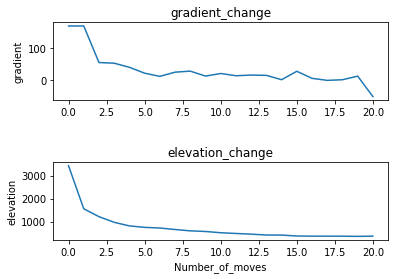

In [16]:
# サブプロット間の余白を設定(上下の余白をデフォルトの0.2から0.8へ変更)
plt.subplots_adjust(hspace=0.8)

# サブプロットを２個作成し、勾配(gradient)と標高(elevation)の変化を折れ線グラフで表示
plt.subplot(2, 1, 1)
plt.plot(df1['gradient'])
plt.ylabel('gradient')
plt.title('gradient_change')

plt.subplot(2, 1, 2)
plt.plot(df1['elevation'])
plt.xlabel('Number_of_moves')
plt.ylabel('elevation')
plt.title('elevation_change');

## 【問題4】初期値の変更

ここまでの問題では最初のxを136としましたが、xの初期値を変更すると結果が変化します。特にxを139より大きい値にすると、富士山の反対側の斜面を下りていくことになります。

そういった初期値を設定した上で、移動毎の標高はリストに記録し、その過程を可視化してください。

#### ハイパーパラメータの設定

In [17]:
ALPHA = 0.3

#### 変数設定

In [18]:
# 移動毎の標高を記録するリスト elevation_list
elevation_list = []

# 最初の地点initial_point1(Xの初期値)
initial_point = 139

# 最初の地点の勾配　initial_gradient
# numpy配列は0スタートの為、プラス1をする
initial_gradient = compute_gradient(initial_point)

# 移動すべき地点 next_point (初期値: 最初の地点) 
next_point = initial_point

# 各地点の勾配(初期値: 10)
#now_gradient = compute_gradient(initial_point)

append_list = [initial_point , fuji[initial_point][3],
                          initial_gradient, ALPHA]

# elevation_listに、「移動すべき地点・移動すべき地点の標高・現状の勾配」を格納
elevation_list.append(append_list)

# 最大繰り返し回数
max_number_of_repetitions = 1000

#### 処理部

In [19]:
# 最大繰り返し回数まで繰り返す
for _ in range(max_number_of_repetitions):
    
    # 関数compute_gradientで勾配の計算
    now_gradient = compute_gradient(next_point)
    
    # 変化量　を計算
    conversion_quantity = ALPHA * now_gradient
    
    # 関数compute_next_pointで移動すべき地点を計算し、next_pointを更新
    next_point = compute_next_point(next_point, ALPHA)
    
    append_list = [next_point , fuji[next_point][3], now_gradient, ALPHA]
    
    
    # elevation_listに、「移動すべき地点・移動すべき地点の標高・現状の勾配」を格納
    elevation_list.append(append_list)
    
    if initial_gradient > 0:
        # Yes→各地点の勾配がマイナスになればbreak
        if now_gradient < 0:
            break
            
       # No→各地点の勾配がプラスになればbreak       
    elif now_gradient > 0:
        break

#### 結果を表示

In [20]:
# elevation_list をデータフレームで表示 
df2 = pd.DataFrame(elevation_list, columns=['point','elevation', 'gradient', 'ALPHA'])
df2

,point,elevation,gradient,ALPHA
0,139,3664.90,-15.06,0.3
1,143,3019.80,-15.06,0.3
2,188,1351.64,-151.73,0.3
3,178,1033.52,30.44,0.3


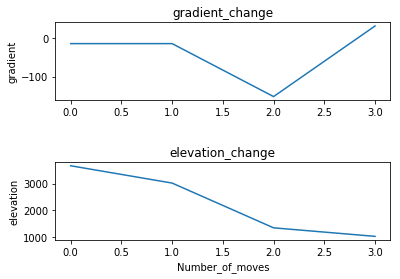

In [21]:
# サブプロット間の余白を設定(上下の余白をデフォルトの0.2から0.8へ変更)
plt.subplots_adjust(hspace=0.8)

# サブプロットを２個作成し、勾配(gradient)と標高(elevation)の変化を折れ線グラフで表示
plt.subplot(2, 1, 1)
plt.plot(df2['gradient'])
plt.ylabel('gradient')
plt.title('gradient_change')

plt.subplot(2, 1, 2)
plt.plot(df2['elevation'])
plt.xlabel('Number_of_moves')
plt.ylabel('elevation')
plt.title('elevation_change');

# 【問題5】（アドバンス課題）並列計算

初期値によって結果が変化するわけですから、0から299まで全ての初期値の計算を行ってみるということを考えられます。

for文を使い繰り返すこともできますが、NumPyの配列を工夫して使うことで複数の計算を同時に行うことができます。ここまで作成した関数を複数の初期値が同時に計算できるように改良してください。

この改良は次のハイパーパラメータの検証にも応用することができます。

- ヒント

    NumPyは配列間で四則演算などの操作が可能です。以下のサンプルコードの3行目と4行目の挙動を参考にしてください。特に4行目の計算はブロードキャストと呼ばれるNumPy独特の機能であるため、各自でも調査してください。
    
>array1 = np.ones(300)
>
>array2 = np.arange(300)
>
>array3 = array1*array2
>
>array4 = array3 + 1 # ブロードキャスト

## 勾配を計算する関数を同時に複数の計算が可能なように改良する

### 関数定義

In [22]:
'''
勾配を計算する(numpy配列対応版)

Parameteres
--------------
point_arr: numpy配列　データ型：int
    初期地のnumpy配列

Returns
--------------
gradient_arr: numpy配列　データ型：float
    今いる地点の勾配
'''    

def compute_gradient_arr(point_arr):
    
    # 勾配を格納するnumpy配列を作成
    gradient_arr = np.array([])
    
    # point_arr の中の値をひとつずつとりだす
    for point in point_arr:
        
        # point が　0 か判別
        if point == 0:
            
            # Yes → gradient を 0 とする
            gradient = 0
            
        else:
            
            # No →　勾配を計算
            gradient = compute_gradient(point)
         
        # gradient_arrの末尾に格納
        gradient_arr = np.append(gradient_arr, np.array([gradient]))
    
    # gradient_arr を返す
    return gradient_arr

In [23]:
# 136の地点の勾配
compute_gradient_arr([136])

array([168.35])

In [24]:
# 0の地点の勾配
compute_gradient_arr([0])

array([0.])

In [25]:
# 135,136の地点の勾配
compute_gradient_arr([135,136])

array([178.43, 168.35])

#### 検算

In [26]:
(fuji[136 - 1][3] - fuji[136][3])/ (135 - 136)

168.35000000000036

## 次の地点を計算する関数を同時に複数の計算が可能なように改良する

In [27]:
'''
Parameteres
--------------
current_point_arr: int
    現在の地点

Returns
--------------
next_point:int
    移動すべき地点
'''    
def compute_next_point_arr(point_arr):
    
    # 勾配を格納するnumpy配列を作成
    gradient_arr = np.array([])
    
    # 次の地点を格納するnumpy配列を作成
    next_point_arr = np.array([])
    
    # 勾配を格納
    gradient_arr = compute_gradient_arr(point_arr)
    
    # 次の地点　next_point　を計算 ※indexとして使用する為、int型に変換する
    for i in range(len(point_arr)):
        
        # 次の地点を計算
        next_point = int(point_arr[i] - (ALPHA * gradient_arr[i]))
        
        # next_point_arr　の末尾に次の地点を格納
        next_point_arr = np.append(next_point_arr, next_point)
    
    # 次の地点が格納された next_point_arr を返す
    return next_point_arr

In [28]:
compute_next_point_arr([136])

array([85.])

#### 検算

In [29]:
int(136 - (ALPHA * compute_gradient(136)))

85

# 【問題6】（アドバンス課題）ハイパーパラメータの検証
勾配降下法の中で 
α
 はハイパーパラメータであり、前の問題でも複数試して良い結果が得られるものを探しました。これを発展させ、
α
 を一定間隔で変化させていき、それぞれの山の下り方の比較を行ってください。うまい下り方となる 
α
 を見つけるだけではなく、大きかったり小さかった時にどうなるのかを検証して説明してください。

ヒント

検証のための一例として、横軸を 
α
 、縦軸を一定回の繰り返し後のxや標高にした散布図を描いてみるという方法が考えられます。

## 記載するプログラム行を少なくする為、勾配降下法の処理部を関数化する。

In [30]:
'''
Parameteres
--------------
initial_point: int
    現在の地点
    
alpha:float
    ハイパーパラメータ

Returns
--------------
elevation_list:list
    勾配降下法での標高の変化を格納したリスト
    リストの内にリストを格納しており、「地点番号、標高、勾配、ハイパーパラメータ」をそれぞれ格納している。
'''    

def gradient_fall_method(initial_point, alpha):
    
    # 移動毎の標高を記録するリスト elevation_list
    elevation_list = []
    
    # 最初の地点の勾配　initial_gradient
    #numpy配列は0スタートの為、プラス1をする
    initial_gradient = compute_gradient(initial_point)
    
    # 移動すべき地点 next_point (初期値: 最初の地点) 
    next_point = initial_point
    
    # 各地点の勾配(初期値: 10)
    #now_gradient = compute_gradient(initial_point)
    append_list = [initial_point , fuji[initial_point][3],
                              initial_gradient, alpha]
    
    # elevation_listに、「移動すべき地点・移動すべき地点の標高・現状の勾配」を格納
    elevation_list.append(append_list)
    
    # 最大繰り返し回数
    max_number_of_repetitions = 1000
    
    # 最大繰り返し回数まで繰り返す
    for _ in range(max_number_of_repetitions):
        
        # 関数compute_gradientで勾配の計算
        now_gradient = compute_gradient(next_point)
        
        # 関数compute_next_pointで移動すべき地点を計算し、next_pointを更新
        next_point = compute_next_point(next_point, alpha)
        
        append_list = [next_point , fuji[next_point][3], now_gradient, alpha]
        
        # elevation_listに、「移動すべき地点・移動すべき地点の標高・現状の勾配」を格納
        elevation_list.append(append_list)
        
        if initial_gradient > 0:
            # Yes→各地点の勾配がマイナスになればbreak
            if now_gradient < 0:
                break
            
        # No→各地点の勾配がプラスになればbreak       
        elif now_gradient > 0:
            break
    
    return elevation_list

## 136の地点からハイパーパラメータを0.1〜0.5まで変化させた際の勾配降下法での標高の変化を表示する→局所的最適解は地点71の362.29m

### α = 0.1

In [31]:
a1_df = pd.DataFrame(gradient_fall_method(136,0.1), columns=['position', 'elevation', 'graditent', 'ALPHA'])
a1_df

,position,elevation,graditent,ALPHA
0,136,3434.59,168.35,0.1
1,119,1561.94,168.35,0.1
2,113,1219.86,55.28,0.1
3,107,973.32,53.28,0.1
4,102,817.62,40.58,0.1
5,99,753.68,22.37,0.1
6,97,725.72,12.51,0.1
7,94,660.43,25.57,0.1
8,91,602.36,28.72,0.1
9,89,575.07,13.37,0.1


In [32]:
# a1の標高が最も小さい値
a1_min = a1_df.loc[: , ['elevation']].min()
a1_min

elevation    362.29
dtype: float64

### α=0.2

In [33]:
a2_df = pd.DataFrame(gradient_fall_method(136,0.2), columns=['position', 'elevation', 'graditent', 'ALPHA'])
a2_df

,position,elevation,graditent,ALPHA
0,136,3434.59,168.35,0.2
1,102,817.62,168.35,0.2
2,97,725.72,22.37,0.2
3,91,602.36,25.57,0.2
4,88,553.64,13.37,0.2
5,84,488.40,17.10,0.2
6,80,420.60,16.58,0.2
7,79,418.41,2.19,0.2
8,73,368.91,28.27,0.2
9,70,412.27,13.23,0.2


In [34]:
# a1の標高が最も小さい値
a2_min = a2_df.loc[: , ['elevation']].min()
a2_min

elevation    368.91
dtype: float64

### α=0.3

In [35]:
a3_df = pd.DataFrame(gradient_fall_method(136,0.3), columns=['position', 'elevation', 'graditent', 'ALPHA'])
a3_df

,position,elevation,graditent,ALPHA
0,136,3434.59,168.35,0.3
1,85,505.10,168.35,0.3
2,79,418.41,16.70,0.3
3,70,412.27,28.27,0.3
4,82,458.66,-41.94,0.3


In [36]:
# a1の標高が最も小さい値
a3_min = a3_df.loc[: , ['elevation']].min()
a3_min

elevation    412.27
dtype: float64

### α=0.4

In [37]:
a4_df = pd.DataFrame(gradient_fall_method(136,0.4), columns=['position', 'elevation', 'graditent', 'ALPHA'])
a4_df

,position,elevation,graditent,ALPHA
0,136,3434.59,168.35,0.4
1,68,429.49,168.35,0.4
2,84,488.40,-40.17,0.4


In [38]:
# a1の標高が最も小さい値
a4_min = a4_df.loc[: , ['elevation']].min()
a4_min

elevation    429.49
dtype: float64

### α=0.5

In [39]:
a5_df = pd.DataFrame(gradient_fall_method(136,0.5), columns=['position', 'elevation', 'graditent', 'ALPHA'])
a5_df

,position,elevation,graditent,ALPHA
0,136,3434.59,168.35,0.5
1,51,880.44,168.35,0.5
2,26,723.95,49.44,0.5
3,-49,1079.27,151.40,0.5
4,-137,1333.51,177.70,0.5
5,-111,1215.13,-50.56,0.5


In [40]:
# a5の標高が最も小さい値
a5_min = a5_df.loc[: , ['elevation']].min()
a5_min

elevation    723.95
dtype: float64

### 横軸を α、縦軸を各αの時の標高の最低値で散布図を作成

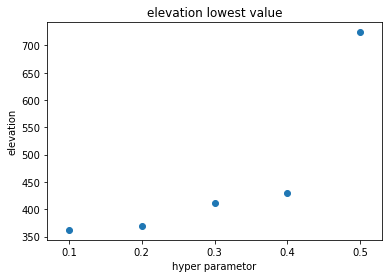

In [41]:

conclusion_x = [0.1, 0.2, 0.3, 0.4, 0.5]
conclusion_y = [a1_min, a2_min, a3_min, a4_min, a5_min]

plt.xlabel('hyper parametor')
plt.ylabel('elevation')
plt.title('elevation lowest value')
plt.scatter(conclusion_x, conclusion_y)

## 考察
#### α=0.1の時 → 局所的最適解の導出成功
- 地点71の362.29mが導出されており、その次に導出した地点で計算が終了している。

#### α=0.2の時 → 局所的最適解の導出失敗
- 最も標高が低い地点が地点73、368.91mとなっており、ハイパーパラメータの値が大きい為、山を登っている。

#### α=0.3の時 → 局所的最適解の導出失敗
- 最も標高が低い地点が地点70、412.27mとなっており、ハイパーパラメータの値が大きい為、山を登っている。

#### α=0.4の時 → 局所的最適解の導出成功
- 最も標高が低い地点が地点68、429.49mとなっており、ハイパーパラメータの値が大きい為、山を登っている。

#### α=0.5の時 → 局所的最適解の導出成功
- 最も標高が低い地点が地点26、723.95mとなっており、ハイパーパラメータの値が大きい為、山を登っている。

### 上記の結果より初期値136の場合はα=0.1が最適

# 【問題7】（アドバンス課題）局所最適解
山を下りることで最終的には海（標高が0）に向かいたいですが、勾配降下法は「局所的最適解」となる地点にしか到達しない可能性があります。局所的最適解とはどういったもので、それへの対策はどういったことができるかを調査して説明してください。

言葉だけではなく、作成した関数も活用できると良いでしょう。

## ①局所的最適解と大局的最適解の違いについて

### 最適解とは
- 目的関数のグラフにおいて最小値、又は最大値となる点

### 最適化とは
- 最適解を求める事

### 局所的最適解とは
- ある特定の範囲内に限った場合の最適解

### 大域的最適解
- 全ての範囲の中での最適解

### 以下に富士下山問題の局所的最適解(local_optimal_solution)、および大域的最適解(global_optimal_solution)を表示する

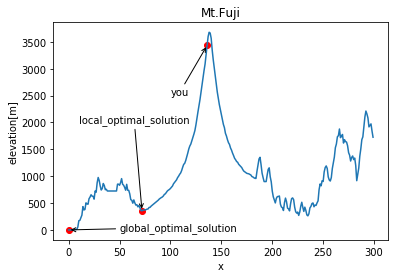

In [42]:
# テキストと矢印を表示
plt.annotate('you',xy=(136, 3434.59),xytext=(100, 2500), arrowprops = {'arrowstyle':'->'})


plt.annotate('local_optimal_solution',xy=(72,355.68 ),xytext=(10, 2000), arrowprops = {'arrowstyle':'->'})


plt.annotate('global_optimal_solution',xy=(0, 0),xytext=(50, 0), arrowprops = {'arrowstyle':'->'})

# 赤丸を表示
plt.plot(136, 3434.59,'ro')

plt.plot(72, 355.68,'ro')

plt.plot(0, 0,'ro')


# X軸の名前を指定
plt.xlabel('x')

# Y軸の名前を指定
plt.ylabel('elevation[m]')

# グラフのタイトルを指定
plt.title('Mt.Fuji')

# グラフを表示
plt.plot(fuji[:,0],fuji[:,3]);

### 上記のグラフより、局所的最適解はX=72、大域的最適解はX=0となる

## ②勾配降下法にて「局所的最適解」となる地点にしか到達しない時の対処
### ハイパーパラメータの値を大きくする
#### 理由：ハイパーパラメータαの値が小さいと、以下の図のような局所的最適解(Locally optimal solution)から大局的最適解(Globally optimal solution)までに標高が高くなっている部分を乗り越えられない


#### 詳細：関数compute_next_point内で、次の地点は以下のプログラムで計算されている。このプログラムは現在地点の勾配がプラスであった場合は、次の地点Xをより左側(より小さく)に、勾配がマイナスであった場合は、より右側(より大きく)にするよう処理する。
>next_point = int(point_arr[i] - (ALPHA * gradient_arr[i]))


### 以下の図の場合、仮に現在地がpoint_Xとなった時、勾配はマイナス(右下がりのグラフ)の為、次の地点はpoint_Xより右側となる。この後も次の地点を計算されるが、1回の移動量であるαを大きくしなければ同様の動作を繰り返すことになり、大局的最適解にはたどり着かない状態となる。

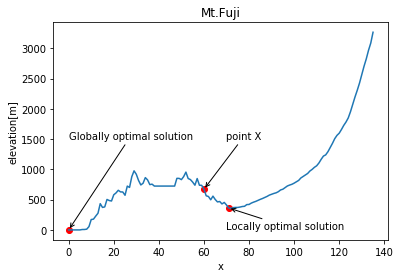

In [43]:
# テキストと矢印を表示
plt.annotate('Locally optimal solution',xy=(71, 362.29),xytext=(70, 10), arrowprops = {'arrowstyle':'->'})
# テキストと矢印を表示
plt.annotate('Globally optimal solution',xy=(0, 0),xytext=(0, 1500), arrowprops = {'arrowstyle':'->'})
# テキストと矢印を表示
plt.annotate('point X',xy=(60, 672.24),xytext=(70, 1500), arrowprops = {'arrowstyle':'->'})

# 赤丸を表示
plt.plot(71, 362.29,'ro')

# 赤丸を表示
plt.plot(0, 0,'ro')

# 赤丸を表示
plt.plot(60, 672.24,'ro')

# X軸の名前を指定
plt.xlabel('x')

# Y軸の名前を指定
plt.ylabel('elevation[m]')

# グラフのタイトルを指定
plt.title('Mt.Fuji')

# グラフを表示
plt.plot(fuji[:136,0],fuji[:136,3]);